# Conceptual 

## Question 1 

The null hypothesis in this case is that there is no relationship between TV, radio or newspaper advertising and sales. In Table 3.4, we see that the p-values for TV and radio are very low (< 0.0001); therefore we can reject the null hypothesis and determine that there is relationship between the amount spent on radio and TV advertising and sales. However, the same does not hold when it comes to newspaper advertising. The p-value is .8599 so we can not reject the null hypothesis.

## Question 2 

KNN classifier identifies the K points in the training data that are closest to point that we are considering. It then estimates the conditional probability for for each class. The point is then assigned to the class with the highest conditional probability. Similarly, the KNN regression identifies the K training observations that are closest to the observation under consideration. The difference is that in KNN regression the average of all the training responses is used to predict the value of the observation.

# Question 3 

### part a 

The equation looks like so: y-hat = 20X1 + .07X2 + 35X3 + .01X1X2 -10X1X3 + 50

When GPA and IQ are fixed, y-hat for females comes down to 10X1 + 35 versus 20X1 for males. There fore when the GPA is higher than 3.5 a male will begin earning more than a woman. 

Therefore, the correct answer is "For a fixed value of IQ and GPA, males earn more on average than females given that the gpa is high enough.

### part b

y-hat = 20X1 + .07X2 + 35X3 + .01X1X2 -10X1X3 + 50

y-hat = 20(4.0) + .07(110) + 35(1) + .01(4.0 x 110) -10(4.0 x 1) + 50

y-hat = $137,100

### part c 

False, just because the coefficient is small we have no evidence saying that the p-value is small and there is no relationship between X4 and the starting salary after graduation. 

# Question 4 

### part a 

It is possible for the RSS of the cubic regression to be less than that of the training data because it can fit more of the points.

### part b

In the case of the test data, I believe that the RSS of the linear regression would be lower because it actually models the true relationship between X and Y. 

### part c 

The bias of the model would be very high with a linear regression but since we don't know how far it is from linear it is difficult to say how their RSSs would compare.

### part d 

Same as above 

# Applied 

## Question 8 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [25]:
auto_df = pd.read_csv('../data/Auto.csv')
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'], errors='coerce')
print(auto_df.shape)
auto_df.dropna(inplace=True)
print(auto_df.shape)
auto_df.head()

(397, 9)
(392, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [30]:
from sklearn.linear_model import LinearRegression

X = auto_df['mpg'].reshape(-1, 1)
y = auto_df['horsepower']

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

In [36]:
from sklearn.metrics import r2_score
from sklearn.feature_selection import f_regression

f_score, p_value = f_regression(X, y)
r2 = r2_score(y, y_pred)
print('Coefficient: {}'.format(lin_reg.coef_))
print('Residuals: {}'.format(lin_reg.residues_))
print('r^2: {}'.format(r2))
print('F-score: {}'.format(f_score))
print('p-value: {}'.format(p_value))

Coefficient: [-3.83888803]
Residuals: 228271.6651404965
r^2: 0.6059482578894348
F-score: [ 599.7177409]
p-value: [  7.03198903e-81]


/Users/Dayo/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


### part a 

There is a somewhat strong relationship between horsepower and mpg as indicated by the very high F-score and very low p-value. The relationship between mpg and horsepwoer is negative as signified by the -3.83 coefficient.

### part b 

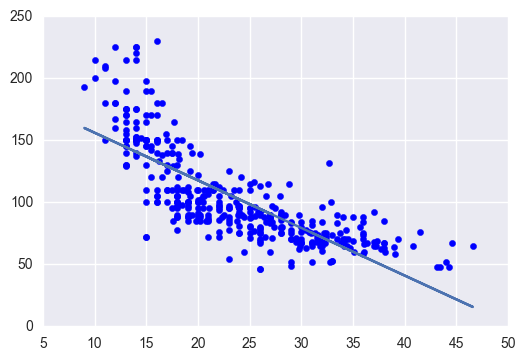

In [27]:
plt.scatter(auto_df['mpg'], auto_df['horsepower'], color='blue')
plt.plot(auto_df['mpg'], y_pred, '-')
plt.show()

## Question 9 

### part a 

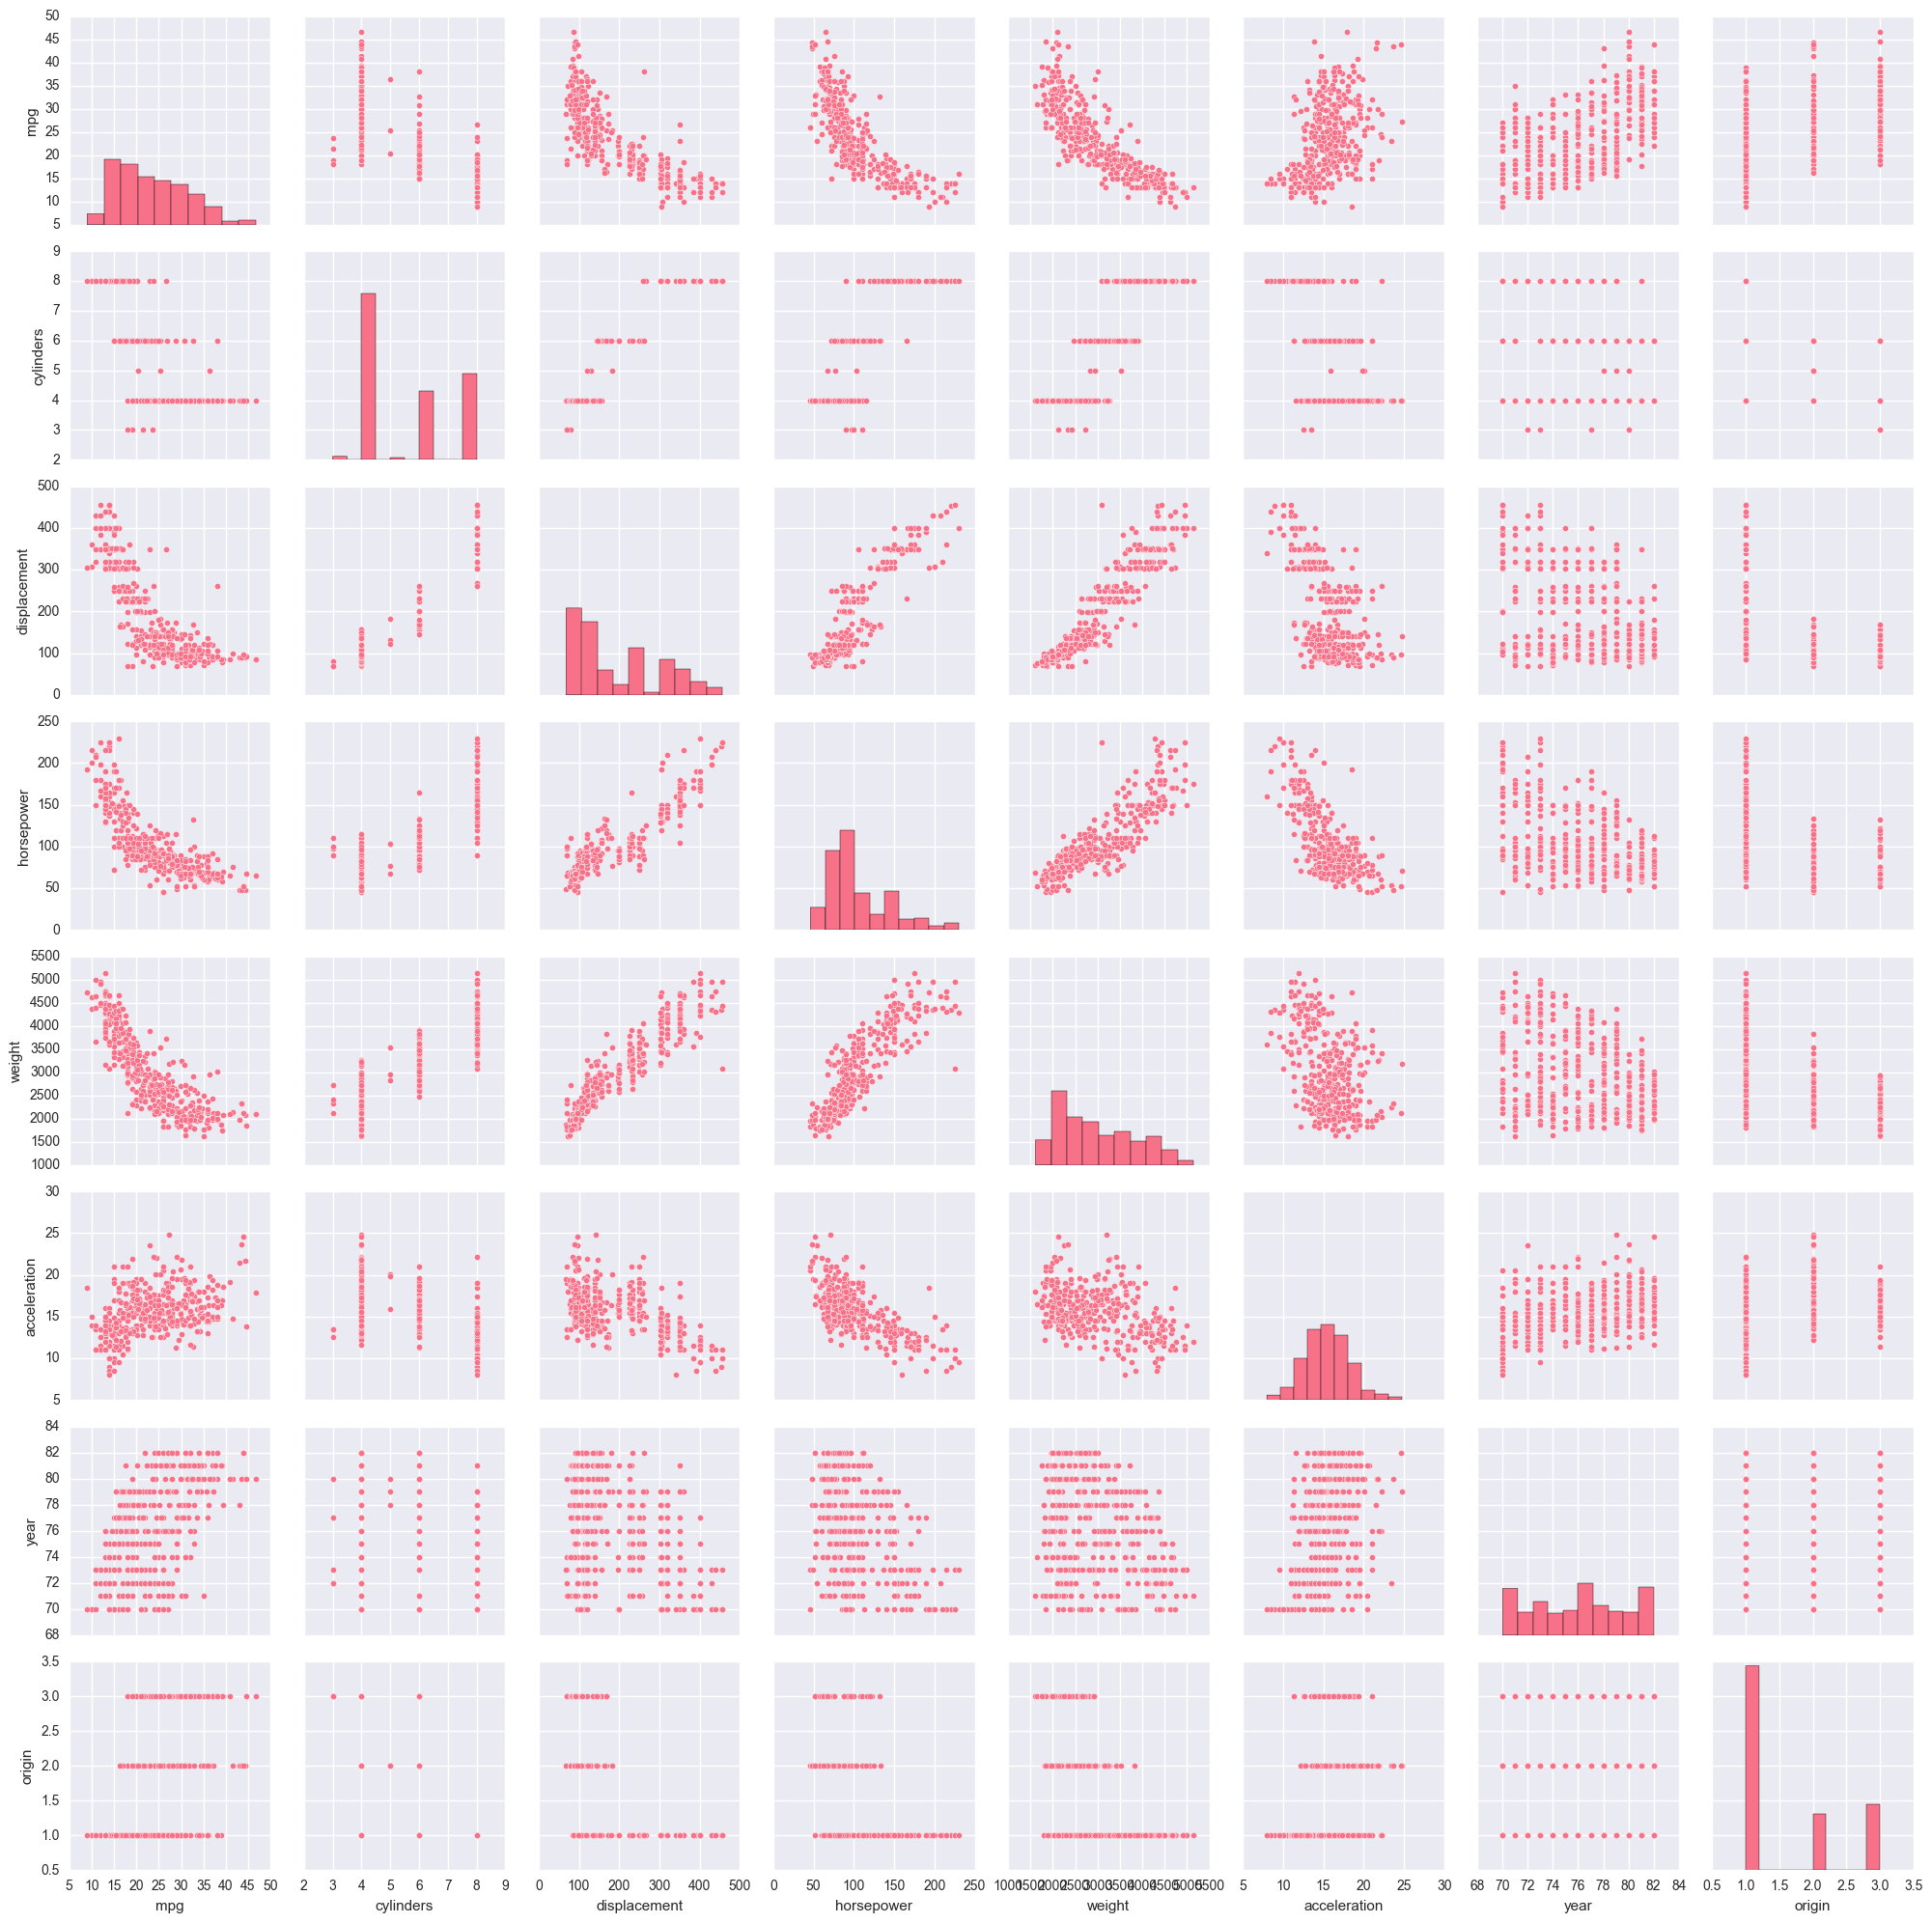

In [39]:
sns.set_palette("husl")
sns.pairplot(auto_df)

### part b 

In [47]:
np.corrcoef(auto_df.drop('name', axis=1))

array([[ 1.        ,  0.9999456 ,  0.99997094, ...,  0.99931373,
         0.99889364,  0.9988138 ],
       [ 0.9999456 ,  1.        ,  0.99999442, ...,  0.99898293,
         0.9984519 ,  0.99836066],
       [ 0.99997094,  0.99999442,  1.        , ...,  0.99912345,
         0.99862156,  0.99853447],
       ..., 
       [ 0.99931373,  0.99898293,  0.99912345, ...,  1.        ,
         0.99990547,  0.99987883],
       [ 0.99889364,  0.9984519 ,  0.99862156, ...,  0.99990547,
         1.        ,  0.99999711],
       [ 0.9988138 ,  0.99836066,  0.99853447, ...,  0.99987883,
         0.99999711,  1.        ]])

### part c

In [54]:
from sklearn.linear_model import LinearRegression

X = auto_df.drop('horsepower', axis=1)
X = pd.get_dummies(auto_df, columns=['name'])
y = auto_df['horsepower']

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

In [59]:
from sklearn.metrics import r2_score
from sklearn.feature_selection import f_regression

names = ['mpg', 'cylinders', 'displacement', 'weight',
       'acceleration', 'year', 'origin']

f_statistics, p_values = f_regression(X, y)
r2 = r2_score(y, y_pred)
print('Intercept: {}'.format(lin_reg.intercept_))
print('Coefficients:')
for i in range (0, len(names)):
    print('\t{}: {}'.format(names[i], lin_reg.coef_[i]))
print('Residuals: {}'.format(lin_reg.residues_))
print('F-statistic:')
for i in range (0, len(names)):
    print('\t{}: {}'.format(names[i], f_statistics[i]))
print('p-values:')
for i in range (0, len(names)):
    print('\t{}: {}'.format(names[i], p_values[i]))
print('r^2: {}'.format(r2))

Intercept: -3.083755473198835e-12
Coefficients:
	mpg: 1.9796711265058924e-14
	cylinders: 9.706124792785431e-14
	displacement: -2.220446049250313e-15
	weight: 1.000000000000006
	acceleration: 5.551115123125783e-16
	year: 7.577272143066693e-15
	origin: -2.3592239273284576e-16
Residuals: []
F-statistic:
	mpg: 599.717740901579
	cylinders: 957.7132728829677
	displacement: 1610.7195137018286
	weight: 2.5091483638207008e+17
	acceleration: 1154.0988679421387
	year: 352.8436322504387
	origin: 81.78763166548045
p-values:
	mpg: 7.031989029403365e-81
	cylinders: 4.633884030164167e-107
	displacement: 1.5108887258739816e-140
	weight: 0.0
	acceleration: 1.3643468773730257e-118
	year: 1.5818862297815815e-56
	origin: 7.22017455683312e-18
r^2: 1.0


/Users/Dayo/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function residues_ is deprecated; ``residues_`` is deprecated and will be removed in 0.19
  warnings.warn(msg, category=DeprecationWarning)


All of the predictors have a statistically significant relationship besides weight. The coefficient for year that means with everything held constant a change in the year will effect the horsepower by 7.58e-16 units.

## Question 10

### part a 

In [61]:
carseats_df = pd.read_csv('../data/Carseats.csv')
carseats_df.drop('Unnamed: 0', inplace=True, axis=1)
carseats_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [82]:
X_first = carseats_df[['Price', 'Urban', 'US']]
X_first = pd.get_dummies(X_first, columns=['Urban', 'US'])
y = carseats_df['Sales']
lin_reg = LinearRegression()
lin_reg.fit(X_first, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### part b 

In [73]:
attribs = list(X)
for i in range(0, len(attribs)):
    print("{}: {}".format(attribs[i], lin_reg.coef_[i]))

Price: -0.054458849177582175
Urban_No: 0.010958075407071778
Urban_Yes: -0.010958075407068226
US_No: -0.6002863488970568
US_Yes: 0.600286348897061


### part d 

In [75]:
f_statistics, p_values = f_regression(X, y)
for i in range(0, len(attribs)):
    print("{}: {}".format(attribs[i], p_values[i]))

Price: 7.618187011915498e-21
Urban_No: 0.7585069603942085
Urban_Yes: 0.7585069603942085
US_No: 0.0003723395870148404
US_Yes: 0.0003723395870148404


We can reject the null hypothesis for price and US.

### part e 

In [84]:
X_second = carseats_df[['Price', 'US']]
X_second = pd.get_dummies(X_second, columns=['US'])

lin_reg2 = LinearRegression()
lin_reg2.fit(X_second, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### part f 

In [85]:
y_pred1 = lin_reg.predict(X_first)
y_pred2 = lin_reg2.predict(X_second)

r2_first = r2_score(y, y_pred1)
r2_second = r2_score(y, y_pred2)
print(r2_first)
print(r2_second)

0.239275392184
0.239262888427


In [86]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y, y_pred1)
rmse2 = mean_squared_error(y, y_pred2)
print(rmse)
print(rmse2)

6.05208667852
6.0521861545


It seems as if the first model performs better in terms of the model accounting for the variability in predictions and making closer predictions.

## Question 11 

In [110]:
np.random.seed(26)

X = np.random.normal(size=100)
X = X.reshape(-1, 1)
y = 2*X + np.random.normal(size=100)

### part a

In [104]:
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)